# Plot field test Hydraulic Conductivity values against Freeze and Cherry (1979) theoretical Hydraulic Conductivity ranges for various rock types.

# 1) Load All Libraries 
## 1.1) Import Required Packages:

In [1]:
#Import Packages: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams 
rcParams['font.family']='sans-serif'
rcParams['font.sans-serif']=['Arial']
rcParams['ytick.labelsize'] = 13
rcParams['xtick.labelsize'] = 13
rcParams['xtick.labelcolor'] = 'dimgrey'
rcParams['ytick.labelcolor'] = 'dimgrey'

import warnings
warnings.filterwarnings('ignore')

## 1.2) Load the range of hydraulic conductivities for various rock types, based on Freeze and Cherry (1979)

In [2]:
dic_rock_krange = {'rock_name':('Weathered Granite','Karst Limestone','Permeable Basalt','Fractured Igneous and Metamorphic Rocks','Limestone and Dolomite','Sandstone','Kimberlite Pipes','Shale','Unfractured Igneous and Metamorphic Rocks','Unweathered Marine Clay','Glacial Till','Silt, Loess','Silty Sand','Clean Sand','Gravel','Coarse Sand','Medium Sand','Fine Sand'),
                   'k_max': (4.49, 1730, 1730, 25.9, 0.518, 0.518, 1.5, 0.000173, 0.000017, 0.000173, 0.173, 1.73, 20, 300, 2590, 518, 43.2, 17.3),
                   'k_min': (2.850000e-01,8.640000e-02,3.460000e-02,6.910000e-04,8.640000e-05,2.590000e-05,6.000000e-07,8.640000e-09,2.590000e-09,6.910000e-08,8.640000e-08,8.640000e-05,4.500000e-02,5.000000e-01,2.590000e+01,7.780000e-02,7.780000e-02,1.730000e-02),
                   'loc': (95,90,85,80,75,70,65,60,55,45,40,35,30,25,20,15,10,5)}


In [3]:
df = pd.DataFrame(dic_rock_krange)
df

,rock_name,k_max,k_min,loc
0,Weathered Granite,4.490000,2.850000e-01,95
1,Karst Limestone,1730.000000,8.640000e-02,90
2,Permeable Basalt,1730.000000,3.460000e-02,85
3,Fractured Igneous and Metamorphic Rocks,25.900000,6.910000e-04,80
4,Limestone and Dolomite,0.518000,8.640000e-05,75
5,Sandstone,0.518000,2.590000e-05,70
6,Kimberlite Pipes,1.500000,6.000000e-07,65
7,Shale,0.000173,8.640000e-09,60
8,Unfractured Igneous and Metamorphic Rocks,0.000017,2.590000e-09,55
9,Unweathered Marine Clay,0.000173,6.910000e-08,45


In [4]:
#Baseplot - Declare Data:
rocktype = np.array(df['rock_name'])
kmax = np.array(df['k_max'])
kmin = np.array(df['k_min'])
loc = np.array(df['loc'])

# Baseplot - Create Arrays from BasePlot Data:
rocktype_np = np.array(rocktype)
kmax_np = np.array(kmax)
kmin_np = np.array(kmin)
loc_np = np.array(loc)
height = kmax_np-kmin_np

georocdata = ([rocktype_np], [kmax_np], [kmin_np], [loc_np])
print(georocdata)


([array(['Weathered Granite', 'Karst Limestone', 'Permeable Basalt',
       'Fractured Igneous and Metamorphic Rocks',
       'Limestone and Dolomite', 'Sandstone', 'Kimberlite Pipes', 'Shale',
       'Unfractured Igneous and Metamorphic Rocks',
       'Unweathered Marine Clay', 'Glacial Till', 'Silt, Loess',
       'Silty Sand', 'Clean Sand', 'Gravel', 'Coarse Sand', 'Medium Sand',
       'Fine Sand'], dtype=object)], [array([4.49e+00, 1.73e+03, 1.73e+03, 2.59e+01, 5.18e-01, 5.18e-01,
       1.50e+00, 1.73e-04, 1.70e-05, 1.73e-04, 1.73e-01, 1.73e+00,
       2.00e+01, 3.00e+02, 2.59e+03, 5.18e+02, 4.32e+01, 1.73e+01])], [array([2.85e-01, 8.64e-02, 3.46e-02, 6.91e-04, 8.64e-05, 2.59e-05,
       6.00e-07, 8.64e-09, 2.59e-09, 6.91e-08, 8.64e-08, 8.64e-05,
       4.50e-02, 5.00e-01, 2.59e+01, 7.78e-02, 7.78e-02, 1.73e-02])], [array([95, 90, 85, 80, 75, 70, 65, 60, 55, 45, 40, 35, 30, 25, 20, 15, 10,
        5], dtype=int64)])


# 2) Load Field Hydraulic Conductivity Test Data

In [5]:
# Data - Examples of Aquifer Test K-values that I want to Plot as Points onto the Grapth

#Data - Import field/Aquifer Test Data:
data = pd.read_csv('AQT_KValues.csv')
data

,Bore_ID,Area,Formation,K-value (m/d)
0,NKW-TW01,NKW,Fractured Igneous and Metamorphic Rocks,16.200000
1,DSM-TW01,DSME,Limestone and Dolomite,0.012800
2,DSME-VWP01,DSME,Weathered Granite,0.300000
3,DSWM-MP02,DSWM,Unfractured Igneous and Metamorphic Rocks,0.000003


In [6]:
rocktype_np

array(['Weathered Granite', 'Karst Limestone', 'Permeable Basalt',
       'Fractured Igneous and Metamorphic Rocks',
       'Limestone and Dolomite', 'Sandstone', 'Kimberlite Pipes', 'Shale',
       'Unfractured Igneous and Metamorphic Rocks',
       'Unweathered Marine Clay', 'Glacial Till', 'Silt, Loess',
       'Silty Sand', 'Clean Sand', 'Gravel', 'Coarse Sand', 'Medium Sand',
       'Fine Sand'], dtype=object)

In [7]:
kmax_np

array([4.49e+00, 1.73e+03, 1.73e+03, 2.59e+01, 5.18e-01, 5.18e-01,
       1.50e+00, 1.73e-04, 1.70e-05, 1.73e-04, 1.73e-01, 1.73e+00,
       2.00e+01, 3.00e+02, 2.59e+03, 5.18e+02, 4.32e+01, 1.73e+01])

# 3) Plot Hydraulic Conductivities Values

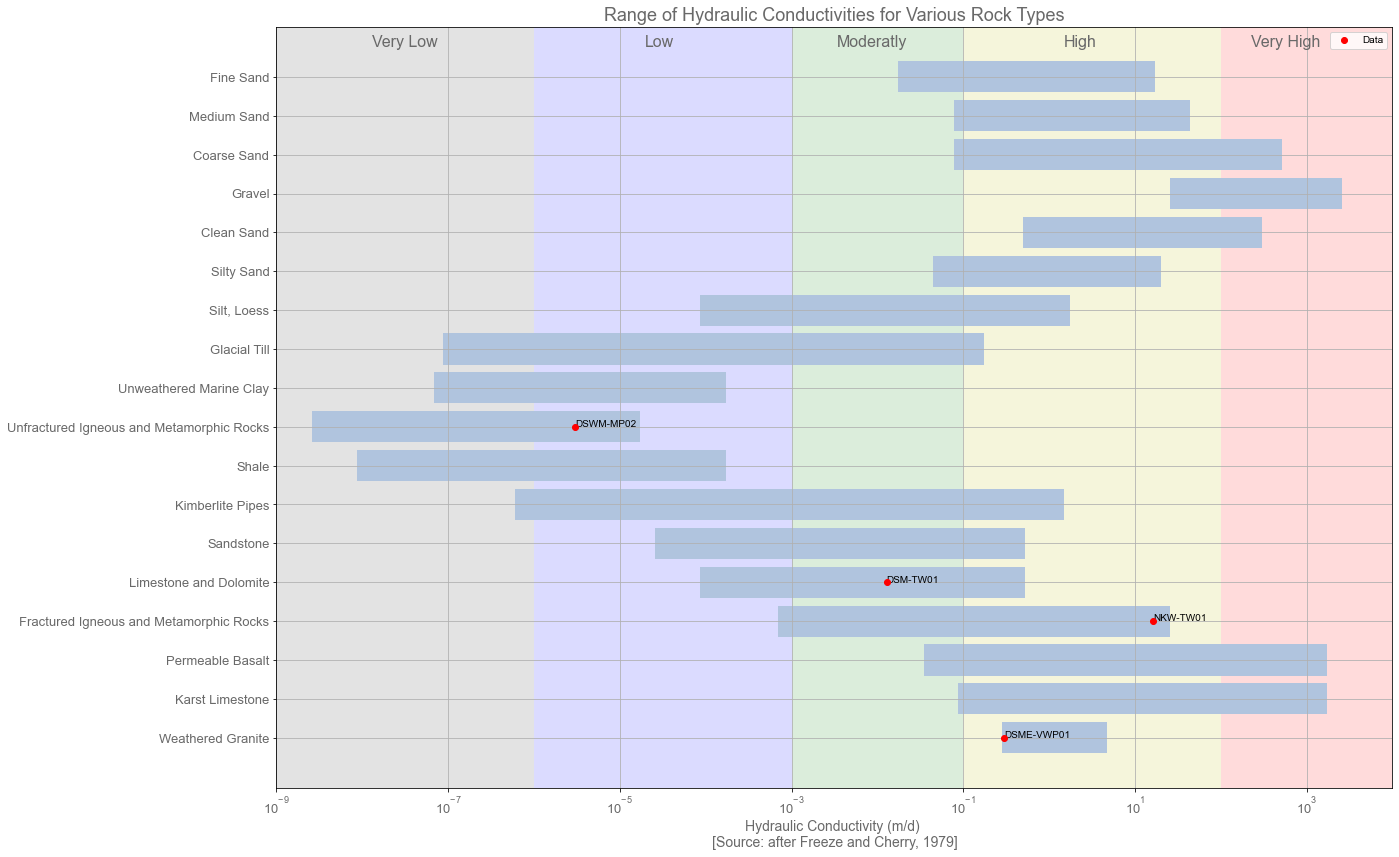

In [9]:
# Create  plot
fig,(ax)=plt.subplots(1,1,figsize=(20,14))     

# Plot Hydrualic Conductivity Zones:
plt.axvspan(100, 10000, facecolor='r', alpha=0.14)             #'High'
plt.axvspan(0.1, 100, facecolor='y', alpha=0.14)               #'Intermediate'
plt.axvspan(0.001, 0.1, facecolor='g', alpha=0.14)              #'Low'
plt.axvspan(0.000001, 0.001, facecolor='b', alpha=0.14)         #'Very Low'
plt.axvspan(0.000000001, 0.000001, facecolor='k', alpha=0.11)  #'Essent. Impermeable'

ax.barh(rocktype_np, kmax_np, left= kmin_np, height=-0.8, align='center', color='lightsteelblue',zorder=1) #color hex=#eac086 #BCDFC1
ax.scatter(data['K-value (m/d)'], data['Formation'], marker='o', zorder=10, color='r', label="Data")

# Add text
ax.annotate('Very High', xy=(100, 'Fine Sand'), xycoords='data', xytext=(30,30), textcoords='offset points',fontsize=16,color='dimgrey')
ax.annotate('High', xy=(1, 'Fine Sand'), xycoords='data', xytext=(15,30), textcoords='offset points',fontsize=16,color='dimgrey')
ax.annotate('Moderatly', xy=(0.01, 'Fine Sand'), xycoords='data', xytext=(-40,30), textcoords='offset points',fontsize=16,color='dimgrey')
ax.annotate('Low', xy=(0.00001, 'Fine Sand'), xycoords='data', xytext=(25,30), textcoords='offset points',fontsize=16,color='dimgrey')
ax.annotate('Very Low', xy=(0.00000001, 'Fine Sand'), xycoords='data', xytext=(10,30), textcoords='offset points',fontsize=16,color='dimgrey')

ax.set_xscale('log')
#ax.set_xticks()

ax.set_xlabel('Hydraulic Conductivity (m/d) \n[Source: after Freeze and Cherry, 1979]',fontsize=14,color='dimgrey')
ax.set_title('Range of Hydraulic Conductivities for Various Rock Types',fontsize=18,color='dimgrey')
n = data['Bore_ID']
for i, txt in enumerate(n):
    ax.annotate(txt, (data['K-value (m/d)'][i], data['Formation'][i]))

ax.grid()
ax.set_xlim(0.000000001,10000)
ax.legend()
# save the figure to file
plt.savefig(r'K_Plot1.png',dpi=300,bbox_inches='tight') 